<a href="https://colab.research.google.com/github/andreadosi1986/andreadosi/blob/master/Copy_of_ProgettoCariocaSardinia4Classes3SingularValues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install rasterio
!pip install fiona

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 245 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 5.1 MB/s 


In [ ]:
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.animation as animation
from matplotlib import rc
import rasterio
from rasterio import mask
import fiona
import skimage
from skimage.measure import regionprops
import random
import pandas as pd
from skimage import filters
import patchify
import tifffile as tiff
import tensorflow as tf
import keras
from scipy.ndimage import rotate
import fiona
from rasterio.plot import reshape_as_image
import tensorflow.keras.utils

In [ ]:
#TOTAL SARDINIA CUBE
sardinia_array = rasterio.open('/content/drive/MyDrive/datamining/prisma/Brazil/PRS_L2C_STD_20210715102524_20210715102528_0001_FULLNew.tif').read()

In [ ]:
#TOTAL SARDINIA MASK
numpy_mask = rasterio.open('/content/drive/MyDrive/datamining/prisma/Sardinia/SardiniaMask2018New.tif').read()

In [ ]:
print(sardinia_array.shape, numpy_mask.shape )

(231, 1249, 1267) (1, 1249, 1267)


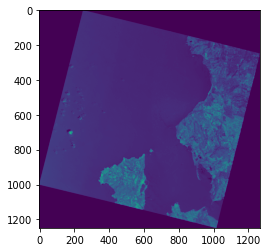

In [ ]:
from random import randint

plt.imshow(sardinia_array[119,:,:])
plt.show()

In [ ]:
#maximum and minimum putting to 0 the black stripes
print(np.max(np.where(sardinia_array>1, 0,sardinia_array )), np.min(sardinia_array))

0.98695844 0.0


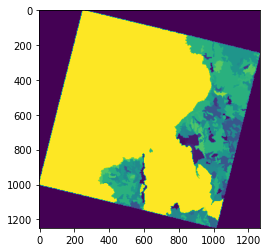

[ 0  1  2  3  5  7  8 12 15 20 21 23 24 25 26 28 29 30 31 32 33 37 41 42
 44]


In [ ]:
plt.imshow(numpy_mask[0,:,:])
plt.show()
print(np.unique(numpy_mask))

In [ ]:
#[ 0  1  2  3  5  7  8 12 15 20 21 23 24 25 26 28 29 30 31 32 33 37 41 42 44]

In [ ]:
### Function to remove noise bands (systematic by prisma)
#CUTS: FROM 1,317 to 1,533 nm and FROM 1,784 to 2,035 nm"
def filter(numpy_cube):
    numpy_cube_cut1 = numpy_cube[0:96]
    numpy_cube_cut2 = numpy_cube[117:141]
    numpy_cube_cut3 = numpy_cube[170:232]
    numpy_cube_cut = np.concatenate((numpy_cube_cut1, numpy_cube_cut2, numpy_cube_cut3), axis=0)

    return numpy_cube_cut

In [ ]:
#remove the noisy band
total_cube = filter(sardinia_array)
total_cube.shape

(181, 1249, 1267)

In [ ]:
#maximum and minimum putting to 0 the black stripes
np.max(np.where(total_cube>1, 0,total_cube ))

0.98695844

In [ ]:
###ROTATION AND CUT THE BLACK STRIPES OF THE IMAGE ###

In [ ]:
#STRAIGHTENING AND OPTIMIZING ALL THE IMAGES IN THE CUBE 
bands = total_cube.shape[0]
lst=[]
for i in range (bands):
  rotate_cube = rotate(total_cube[i,:,:], angle=14.1, reshape=False, order=0)
  lst.append(rotate_cube)
temp_sardinia_cube = np.array(lst)
temp_sardinia_reshape = reshape_as_image(temp_sardinia_cube)



In [ ]:
print(temp_sardinia_cube.shape, temp_sardinia_reshape.shape)

(181, 1249, 1267) (1249, 1267, 181)


In [ ]:
#maximum and minimum putting to 0 the black stripes
print(np.max(np.where(temp_sardinia_cube>1, 0,temp_sardinia_cube )), np.min(temp_sardinia_cube))
print(np.max(np.where(temp_sardinia_reshape>1, 0,temp_sardinia_reshape )), np.min(temp_sardinia_reshape))

0.98695844 0.0
0.98695844 0.0


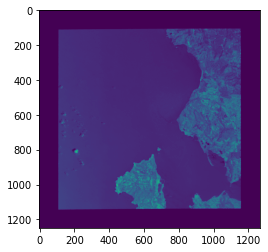

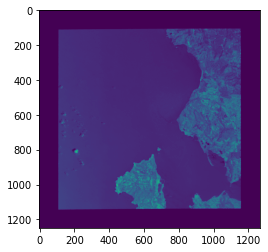

In [ ]:
plt.imshow(temp_sardinia_cube[100,:,:])
plt.show()
plt.imshow(temp_sardinia_reshape[:,:,100])
plt.show()

In [ ]:
final_sardinia_array = temp_sardinia_reshape[150:1100, 150:1100, :]

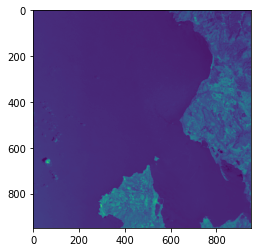

In [ ]:
plt.imshow(final_sardinia_array[:,:,100])
plt.show()

In [ ]:
print(final_sardinia_array.shape, np.min(final_sardinia_array), np.max(final_sardinia_array))

(950, 950, 181) 0.0 0.7305246


In [ ]:
##### ROTATION AND CUT THE BLACK STRIPES OF THE MASK ###

In [ ]:
mask_rotate = rotate(numpy_mask[0,:,:], angle=14.1, reshape=False, order=0)
np.unique(mask_rotate)

array([ 0,  1,  2,  3,  5,  7,  8, 12, 15, 20, 21, 23, 24, 25, 26, 28, 29,
       30, 31, 32, 33, 37, 41, 42, 44], dtype=uint8)

In [ ]:
'''
CLC2018_WM
Corine Land Cover 2018 raster
	
1 Continuous urban fabric
	
2 Discontinuous urban fabric
	
3 Industrial or commercial units
	
4 Road and rail networks and associated land
	
5 Port areas
	
6 Airports
	
7 Mineral extraction sites
	
8 Dump sites
	
9 Construction sites
	
10 Green urban areas
	
11 Sport and leisure facilities
	
12 Non-irrigated arable land
	
13 Permanently irrigated land
	
14 Rice fields
	
15 Vineyards
	
16 Fruit trees and berry plantations
	
17 Olive groves
	
18 Pastures
	
19 Annual crops associated with permanent crops
	
20 Complex cultivation patterns
	
21 Land principally occupied by agriculture, with significant areas of natural vegetation
	
22 Agro-forestry areas
	
23 Broad-leaved forest
	
24 Coniferous forest
	
25 Mixed forest
	
26 Natural grasslands
	
27 Moors and heathland
	
28 Sclerophyllous vegetation
	
29 Transitional woodland-shrub
	
30 Beaches, dunes, sands
	
31 Bare rocks
	
32 Sparsely vegetated areas
	
33 Burnt areas
	
34 Glaciers and perpetual snow
	
35 Inland marshes
	
36 Peat bogs
	
37 Salt marshes
	
38 Salines
	
39 Intertidal flats
	
40 Water courses
	
41 Water bodies
	
42 Coastal lagoons
	
43 Estuaries
	
44 Sea and ocean
	
0 NODATA

'''

'\nCLC2018_WM\nCorine Land Cover 2018 raster\n\t\n1 Continuous urban fabric\n\t\n2 Discontinuous urban fabric\n\t\n3 Industrial or commercial units\n\t\n4 Road and rail networks and associated land\n\t\n5 Port areas\n\t\n6 Airports\n\t\n7 Mineral extraction sites\n\t\n8 Dump sites\n\t\n9 Construction sites\n\t\n10 Green urban areas\n\t\n11 Sport and leisure facilities\n\t\n12 Non-irrigated arable land\n\t\n13 Permanently irrigated land\n\t\n14 Rice fields\n\t\n15 Vineyards\n\t\n16 Fruit trees and berry plantations\n\t\n17 Olive groves\n\t\n18 Pastures\n\t\n19 Annual crops associated with permanent crops\n\t\n20 Complex cultivation patterns\n\t\n21 Land principally occupied by agriculture, with significant areas of natural vegetation\n\t\n22 Agro-forestry areas\n\t\n23 Broad-leaved forest\n\t\n24 Coniferous forest\n\t\n25 Mixed forest\n\t\n26 Natural grasslands\n\t\n27 Moors and heathland\n\t\n28 Sclerophyllous vegetation\n\t\n29 Transitional woodland-shrub\n\t\n30 Beaches, dunes, sands

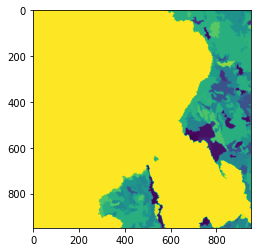

(950, 950)


In [ ]:
final_mask = mask_rotate[150:1100, 150:1100]
plt.imshow(final_mask)
plt.show()
print(final_mask.shape)

In [ ]:
#the 0 values is cut
np.unique(final_mask)

array([ 1,  2,  3,  5,  7,  8, 12, 15, 20, 21, 23, 24, 25, 26, 28, 29, 30,
       31, 32, 33, 37, 42, 44], dtype=uint8)

In [ ]:
#how many classes? ##
print(np.unique(final_mask).shape)

(23,)


In [ ]:
final_mask = np.where((final_mask==2), 1, final_mask )
final_mask = np.where((final_mask==3), 1, final_mask )
final_mask = np.where((final_mask==5), 1, final_mask )
final_mask = np.where((final_mask==7), 2, final_mask )
final_mask = np.where((final_mask==8), 0, final_mask )
final_mask = np.where((final_mask==12), 3, final_mask )
final_mask = np.where((final_mask==15), 3, final_mask )
final_mask = np.where((final_mask==20), 3, final_mask )
final_mask = np.where((final_mask==21), 3, final_mask )
final_mask = np.where((final_mask==23), 4, final_mask )
final_mask = np.where((final_mask==24), 4, final_mask )
final_mask = np.where((final_mask==25), 4, final_mask )
final_mask = np.where((final_mask==26), 4, final_mask )
final_mask = np.where((final_mask==28), 4, final_mask )
final_mask = np.where((final_mask==29), 4, final_mask )
final_mask = np.where((final_mask==30), 0, final_mask )
final_mask = np.where((final_mask==31), 0, final_mask )
final_mask = np.where((final_mask==32), 4, final_mask )
final_mask = np.where((final_mask==33), 0, final_mask )
final_mask = np.where((final_mask==37), 0, final_mask )
final_mask = np.where((final_mask==41), 5, final_mask )
final_mask = np.where((final_mask==42), 5, final_mask )
final_mask = np.where((final_mask==44), 5, final_mask )

In [ ]:
print(np.unique(final_mask))

[0 1 2 3 4 5]


In [ ]:
#reduce final mask to 4 classes: class 1 becames 0, class 4 becames 3
final_mask = np.where((final_mask==1), 0, final_mask )
final_mask = np.where((final_mask==2), 1, final_mask )
final_mask = np.where((final_mask==3), 2, final_mask )
final_mask = np.where((final_mask==4), 2, final_mask )
final_mask = np.where((final_mask==5), 3, final_mask )

In [ ]:
print(np.unique(final_mask))

[0 1 2 3]


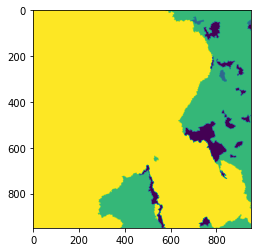

(950, 950)


In [ ]:
plt.imshow(final_mask)
plt.show()
print(final_mask.shape)

In [ ]:
###### SINGULAR VALUES DECOMPOSITION ####

In [ ]:
#build the 2d array for svd
svd_cube = np.reshape(final_sardinia_array, (final_sardinia_array.shape[0]*final_sardinia_array.shape[1], final_sardinia_array.shape[2]))
svd_cube.shape

(902500, 181)

In [ ]:
#SVD application
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=3)
svd.fit(svd_cube)
total_transf_cube = svd.transform(svd_cube)

In [ ]:
import pickle
filename = '/content/drive/MyDrive/datamining/prisma/Sardinia/SvdSardinia3CompNew.sav'
pickle.dump(svd, open(filename, 'wb'))

In [ ]:
total_transf_cube.shape

(902500, 3)

In [ ]:
print(np.min(total_transf_cube), np.max(total_transf_cube))

-1.3954477 6.573936


In [ ]:
#normalize from 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(total_transf_cube)
total_transf_cube_scaled = scaler.transform(total_transf_cube)

In [ ]:
print(np.min(total_transf_cube_scaled), np.max(total_transf_cube_scaled), total_transf_cube_scaled.shape)

0.0 1.0 (902500, 3)


In [ ]:
filename_norm = '/content/drive/MyDrive/datamining/prisma/Sardinia/SvdSardinia3CompNormalizationNew.sav'
pickle.dump(scaler, open(filename_norm, 'wb'))

In [ ]:
#after the svd transformation, reshape the array as an 2D image 
svd_array_norm = np.reshape(total_transf_cube_scaled, (final_sardinia_array.shape[0],final_sardinia_array.shape[1],total_transf_cube_scaled.shape[1]))

In [ ]:
#normalize from 0 to 1 the image
#svd_array_norm = svd_array/np.max(svd_array)

In [ ]:
#check if it is correctly normalized
print("the cube minimum is", np.min(svd_array_norm),"     ", "the cube maximum is",  np.max(svd_array_norm))

the cube minimum is 0.0       the cube maximum is 1.0


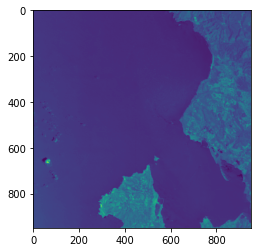

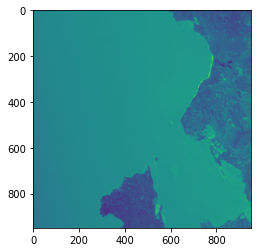

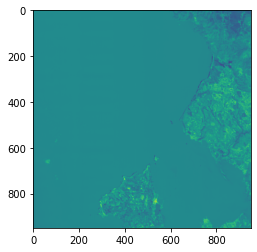

In [ ]:
for i in range (3):
  plt.imshow(svd_array_norm[:,:,i])
  plt.show()

In [ ]:
sardinia_cut = svd_array_norm[:800, 600:]
mask_cut = final_mask[:800, 600:]

In [ ]:
print(np.unique(mask_cut))

[0 1 2 3]


In [ ]:
#msk_lst = list(np.unique(mask_cut))

In [ ]:
#rescale the number of classes
#j = 1
#for i in msk_lst:
  #mask_cut = np.where(mask_cut == i, j, mask_cut)
  #j=j+1

In [ ]:
#print(np.unique(mask_cut), mask_cut.shape)

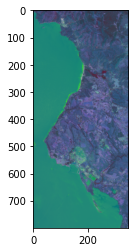

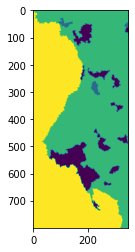

In [ ]:
plt.imshow(sardinia_cut)
plt.show()
plt.imshow(mask_cut)
plt.show()

In [ ]:
#class_weight=[]
#for i in range (6):
 #weight = 1/((mask_cut[mask_cut==i].shape[0])/(mask_cut.shape[0]*mask_cut.shape[1]))
 #class_weight.append(weight)

In [ ]:
#print(class_weight)

In [ ]:
np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/Sardinia3ChannelsNew', sardinia_cut)
np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/SardiniaMask3ChannelsNew', mask_cut)

In [ ]:
###### DIVIDE THE ORIGINAL PICTURE AND THE MASK IN PATCHES OF 128 PIXELS WITH OVERLAP ######

In [ ]:

sardinia_patches = patchify.patchify(sardinia_cut, (128,128,3), 25)

sardinia_mask_patches = patchify.patchify(mask_cut, (128,128), 25)


In [ ]:
print(sardinia_patches.shape, sardinia_mask_patches.shape)

(27, 9, 1, 128, 128, 3) (27, 9, 128, 128)


In [ ]:
print(np.unique(sardinia_mask_patches), np.unique(sardinia_mask_patches).shape)

[0 1 2 3] (4,)


In [ ]:
#reshape patches in a 3d array
patches_res = sardinia_patches.reshape(sardinia_patches.shape[0] * sardinia_patches.shape[1], sardinia_patches.shape[3], sardinia_patches.shape[4], sardinia_patches.shape[5])
patches_mask_res = sardinia_mask_patches.reshape(sardinia_mask_patches.shape[0] * sardinia_mask_patches.shape[1], sardinia_mask_patches.shape[2], sardinia_mask_patches.shape[3])

In [ ]:
print(np.unique(patches_mask_res), patches_res.shape, patches_mask_res.shape)

[0 1 2 3] (243, 128, 128, 3) (243, 128, 128)


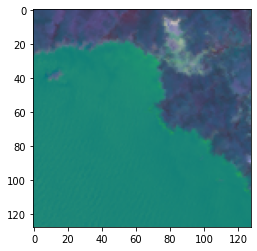

(128, 128, 3)


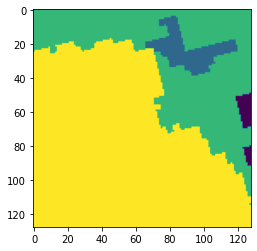

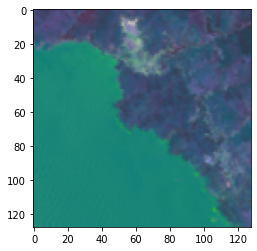

(128, 128, 3)


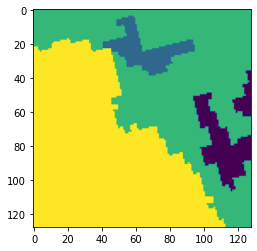

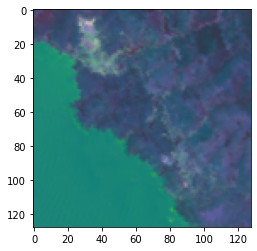

(128, 128, 3)


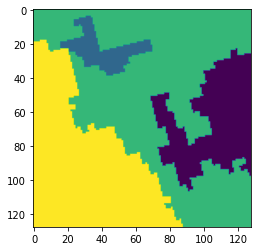

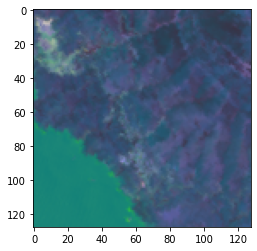

(128, 128, 3)


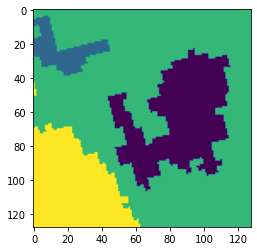

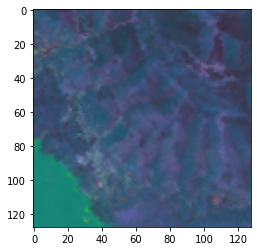

(128, 128, 3)


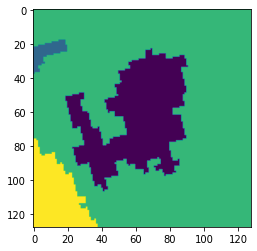

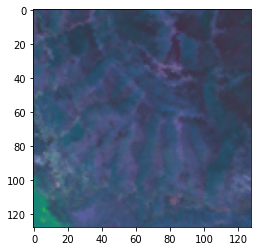

(128, 128, 3)


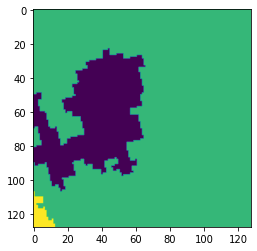

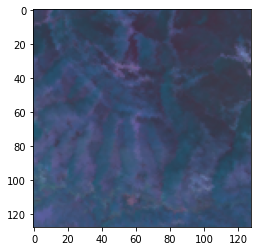

(128, 128, 3)


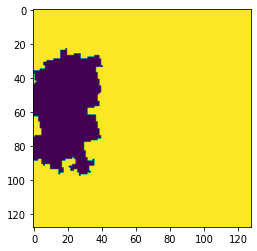

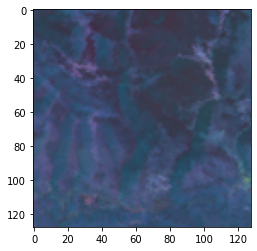

(128, 128, 3)


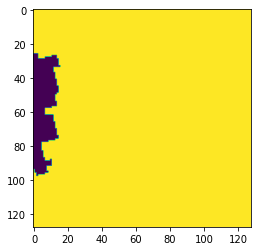

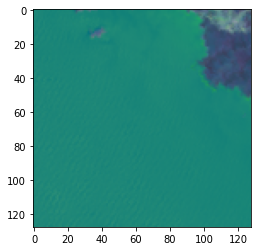

(128, 128, 3)


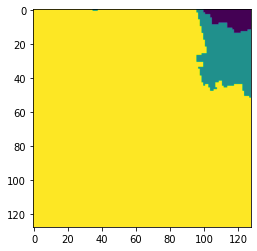

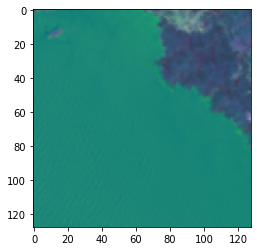

(128, 128, 3)


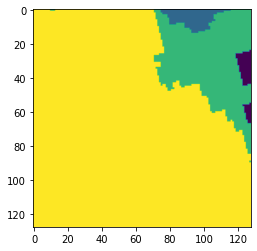

In [ ]:
#check if the picture and the mask are the same 
for i in range (10,20):
  plt.imshow(patches_res[i])
  plt.show()
  print(patches_res[i].shape) 
  plt.imshow(patches_mask_res[i])
  plt.show() 

In [ ]:
# Make sure the order of the spline interpolation is 0, default is 3. 
#With interpolation, the pixel values get messed up.
def rotation(image, seed):
    random.seed(seed)
    angle= random.randint(-180,180)
    r_img = rotate(image, angle, mode='reflect', reshape=False, order=0)
    return r_img

def h_flip(image, seed):
    hflipped_img= np.fliplr(image)
    return  hflipped_img

def v_flip(image, seed):
    vflipped_img= np.flipud(image)
    return vflipped_img

def v_transl(image, seed):
    random.seed(seed)
    n_pixels = random.randint(-64,64)
    vtranslated_img = np.roll(image, n_pixels, axis=0)
    return vtranslated_img

def h_transl(image, seed):
    random.seed(seed)
    n_pixels = random.randint(-64,64)
    htranslated_img = np.roll(image, n_pixels, axis=1)
    return htranslated_img

In [ ]:
######  custom data augmentation  #######

lst_temp = list(patches_res)
lst_temp_mask = list(patches_mask_res)

for i in range (patches_res.shape[0]):
  patches_res_i = patches_res[i,:,:]
  patches_mask_res_i = patches_mask_res[i,:,:]

  lst_temp.extend((rotation(patches_res_i, i), h_flip(patches_res_i, i), v_flip(patches_res_i, i), v_transl(patches_res_i, i), h_transl(patches_res_i, i)))
  lst_temp_mask.extend((rotation(patches_mask_res_i, i), h_flip(patches_mask_res_i, i), v_flip(patches_mask_res_i, i), v_transl(patches_mask_res_i, i), h_transl(patches_mask_res_i, i)))

patches_res = np.array(lst_temp)
patches_mask_res = np.array(lst_temp_mask)

In [ ]:
print(patches_res.shape, patches_mask_res.shape)

(1458, 128, 128, 3) (1458, 128, 128)


In [ ]:
#SECOND DATA AUGMENTATION: ADD RANDOM NOICE ONLY TO THE PATCHES WITH MINING AREA. THEN FLIP, TRANSLATE ECC...

temp_lst_noise = list(patches_res)
temp_lst_mask = list(patches_mask_res)
num = 1
for i in range (len(patches_res)):
  if num in temp_lst_mask[i]:
    mu = np.mean(patches_res[i,:,:])
    noise = np.random.normal(mu, 0.0015, (patches_res[i,:,:].shape[0], patches_res[i,:,:].shape[1], patches_res[i,:,:].shape[2]))
    patches_noise_i = noise + temp_lst_noise[i]
    patches_mask_res_i = temp_lst_mask[i]
    temp_lst_noise.extend((patches_noise_i,rotation(patches_noise_i, i), h_flip(patches_noise_i, i), v_flip(patches_noise_i, i), v_transl(patches_noise_i, i), h_transl(patches_noise_i, i)))
    temp_lst_mask.extend((patches_mask_res_i,rotation(patches_mask_res_i, i), h_flip(patches_mask_res_i, i), v_flip(patches_mask_res_i, i), v_transl(patches_mask_res_i, i), h_transl(patches_mask_res_i, i)))


In [ ]:
print(len(temp_lst_noise), len(temp_lst_mask))

3342 3342


In [ ]:
#THIRD DATA AUGMENTATION: Augment ONLY TO THE PATCHES WITH MINING AREA. 

#temp_lst_noise = list(patches_res)
#temp_list_image = list(patches_res)
#temp_lst_mask = list(patches_mask_res)
temp_list_image = temp_lst_noise

num = 1
for i in range (len(patches_res)):
  if num in temp_lst_mask[i]:
    #mu = np.mean(patches_res[i,:,:])
    #noise = np.random.normal(mu, 0.025, (patches_res[i,:,:].shape[0], patches_res[i,:,:].shape[1]))
    #patches_noise_i = noise + temp_lst_noise[i]
    patches_i = temp_list_image[i]
    patches_mask_res_i = temp_lst_mask[i]
    temp_list_image.extend((patches_i,rotation(patches_i, i), h_flip(patches_i, i), v_flip(patches_i, i), v_transl(patches_i, i), h_transl(patches_i, i)))
    temp_lst_mask.extend((patches_mask_res_i,rotation(patches_mask_res_i, i), h_flip(patches_mask_res_i, i), v_flip(patches_mask_res_i, i), v_transl(patches_mask_res_i, i), h_transl(patches_mask_res_i, i)))


In [ ]:
print(len(temp_list_image), len(temp_lst_mask))


5226 5226


In [ ]:
#patches_res = np.array(temp_lst_noise)
#patches_mask_res = np.array(temp_lst_mask)

In [ ]:
patches_res = np.array(temp_list_image)
patches_mask_res = np.array(temp_lst_mask)

In [ ]:
print(patches_res.shape, patches_mask_res.shape)

(5226, 128, 128, 3) (5226, 128, 128)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


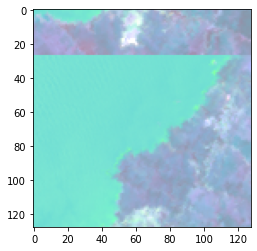

(128, 128, 3)


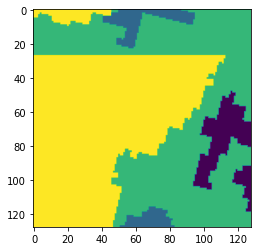

2032
[0 1 2 3]


In [ ]:
i = randint(1459, 3342)
plt.imshow(patches_res[i])
plt.show() 
print(patches_res[i].shape)
plt.imshow(patches_mask_res[i])
plt.show() 
print(i)
print(np.unique(patches_mask_res[i]))

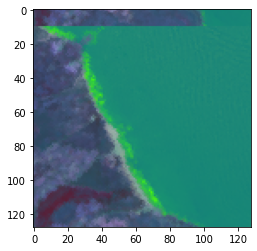

(128, 128, 3)


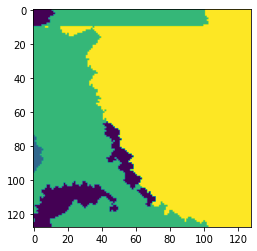

4342
[0 1 2 3]


In [ ]:
i = randint(3342, 5226 )
plt.imshow(patches_res[i])
plt.show() 
print(patches_res[i].shape)
plt.imshow(patches_mask_res[i])
plt.show() 
print(i)
print(np.unique(patches_mask_res[i]))

In [ ]:
#add to the input arrays another dimension for channel 
#train_images = np.expand_dims(patches_res, axis = 3)
train_masks = np.expand_dims(patches_mask_res, axis = 3)
train_images = patches_res


In [ ]:
print(train_images.shape, train_masks.shape)

(5226, 128, 128, 3) (5226, 128, 128, 1)


In [ ]:
print(np.unique(train_masks))

[0 1 2 3]


In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(train_images, train_masks, test_size = 0.2, random_state = 0) 

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(4180, 128, 128, 3) (1046, 128, 128, 3) (4180, 128, 128, 1) (1046, 128, 128, 1)


In [ ]:
print("Class values in the dataset are ... ", np.unique(y_train), np.unique(y_test))

Class values in the dataset are ...  [0 1 2 3] [0 1 2 3]


In [ ]:
##### ONEHOT ENCODING FOR CATECORICAL ###### 

In [ ]:
from tensorflow.keras.utils import to_categorical
n_classes=4 
train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))

In [ ]:
test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

In [ ]:
print(y_train_cat.shape)
print(y_train.shape)
print(y_test_cat.shape)
print(y_test.shape)
print(X_test.shape)
print(X_train.shape)

(4180, 128, 128, 4)
(4180, 128, 128, 1)
(1046, 128, 128, 4)
(1046, 128, 128, 1)
(1046, 128, 128, 3)
(4180, 128, 128, 3)


In [ ]:
np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/y_train_cat4classes3SingValNew', y_train_cat)

In [ ]:
np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/y_train4classes3SingValNew', y_train)
np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/y_test_cat4classes3SingValNew', y_test_cat)
np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/y_test4classes3SingValNew', y_test)
np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/X_test4classes3SingValNew', X_test)
np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/X_train4classes3SingValNew', X_train)

In [ ]:
#np.save('/content/drive/MyDrive/datamining/prisma/Sardinia/class_weight', class_weight)